In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    roc_curve, auc, precision_recall_fscore_support
)
from sklearn.preprocessing import StandardScaler, label_binarize

In [45]:
df=pd.read_csv("Dataset.csv")
df.head(5)

,id,name,fixed acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol,type,Taste,quality
0,1,Chardonnay,7.4,0.00,1.9,0.076,34.0,0.9978,0.56,9.4,Port,Balanced,1
1,2,Cabernet Sauvignon,7.8,0.00,2.6,0.098,67.0,0.9968,0.68,9.8,White,Sour,0
2,3,Merlot,7.8,0.04,2.3,0.092,54.0,0.9970,0.65,9.8,Rose,Earthy,0
3,4,Pinot Noir,11.2,0.56,1.9,0.075,60.0,0.9980,0.58,9.8,White,Bitter,1
4,5,Zinfandel,7.4,0.00,1.9,0.076,34.0,0.9978,0.56,9.4,Rose,Balanced,1


In [46]:
df.dtypes

id                        int64
name                     object
fixed acidity           float64
citric acid             float64
residual sugar          float64
chlorides               float64
total sulfur dioxide    float64
density                 float64
sulphates               float64
alcohol                 float64
type                     object
Taste                    object
quality                   int64
dtype: object

## Removing Irrelevant Columns

### Removing columns like "id" and "name" as they are not relevent to our analysis.

In [47]:
df=df.drop(['id','name'],axis=1)
df.head(5)

,fixed acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol,type,Taste,quality
0,7.4,0.00,1.9,0.076,34.0,0.9978,0.56,9.4,Port,Balanced,1
1,7.8,0.00,2.6,0.098,67.0,0.9968,0.68,9.8,White,Sour,0
2,7.8,0.04,2.3,0.092,54.0,0.9970,0.65,9.8,Rose,Earthy,0
3,11.2,0.56,1.9,0.075,60.0,0.9980,0.58,9.8,White,Bitter,1
4,7.4,0.00,1.9,0.076,34.0,0.9978,0.56,9.4,Rose,Balanced,1


## Checking for any duplicate rows in the dataset and discarding them if any.

In [48]:
print("Number of Duplicate rows : ", (df[df.duplicated()]).shape)

Number of Duplicate rows :  (0, 11)


In [49]:
df.drop_duplicates(inplace=True)
print("Number of Duplicate rows : ", (df[df.duplicated()]).shape)

Number of Duplicate rows :  (0, 11)


## Checking for Null values in Dataset and Removing it


In [50]:
print(df.isnull().sum())

fixed acidity           1
citric acid             2
residual sugar          0
chlorides               1
total sulfur dioxide    4
density                 3
sulphates               0
alcohol                 0
type                    3
Taste                   5
quality                 0
dtype: int64


In [51]:
df = df.dropna()
print(df.isnull().sum())

fixed acidity           0
citric acid             0
residual sugar          0
chlorides               0
total sulfur dioxide    0
density                 0
sulphates               0
alcohol                 0
type                    0
Taste                   0
quality                 0
dtype: int64


<br>

## Plotting the Dataset

### Histogram is a data visualization technique that is used to visualize generally one variable

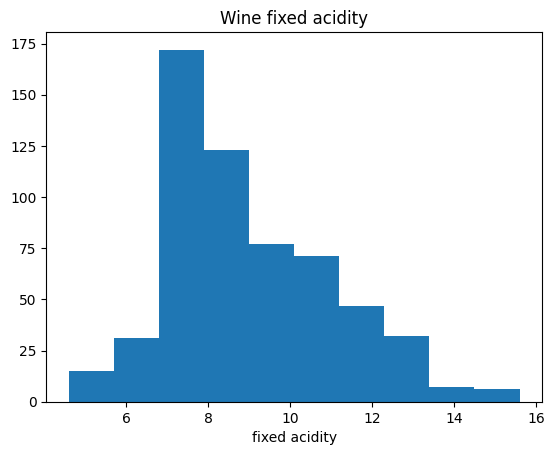

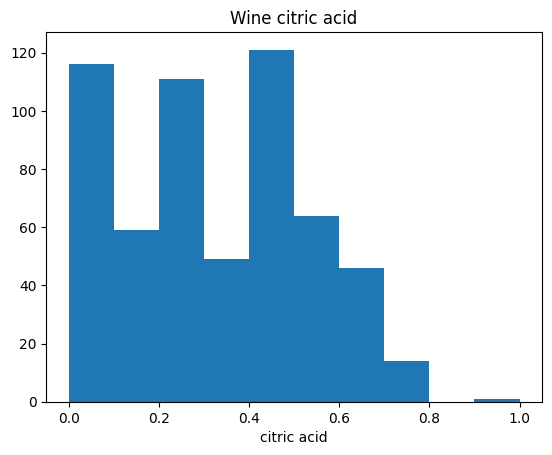

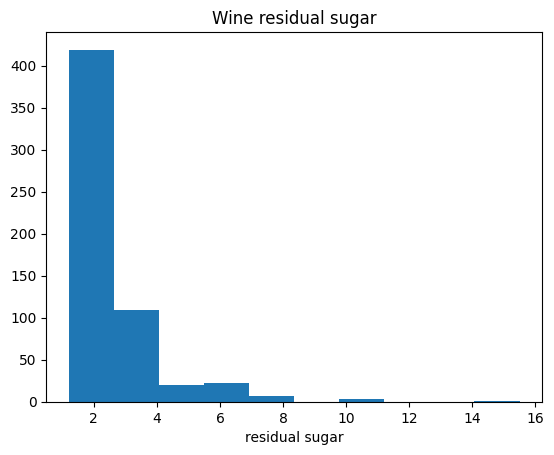

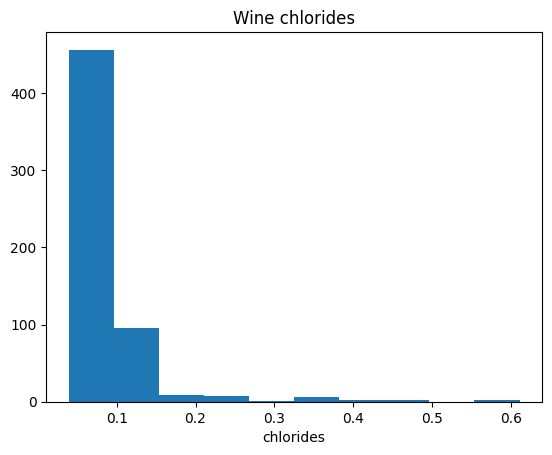

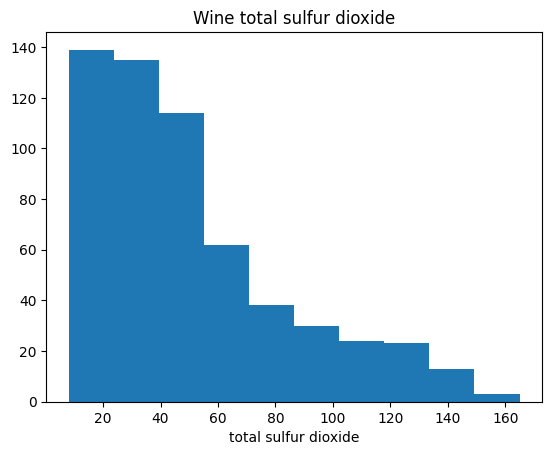

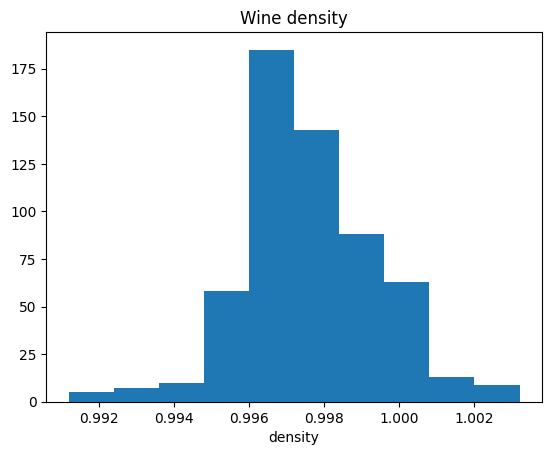

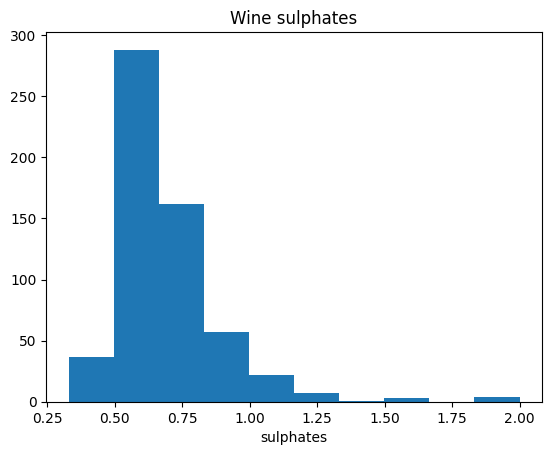

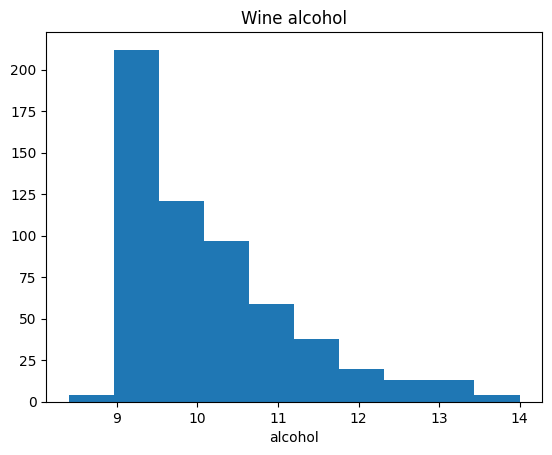

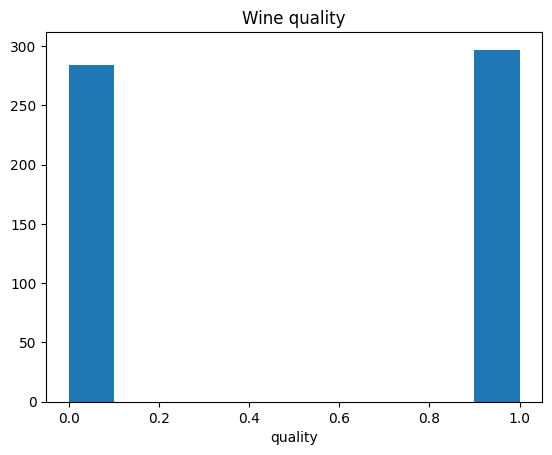

In [52]:
for i in df.columns:
    if df[i].dtype =='float64' or df[i].dtype =='int64':
        col = df[i]
        plt.xlabel(str(i))
        plt.title('Wine '+str(i))
        plt.hist(col)
        plt.show()



## Distribution of nominal variables using count plot
#### A count plot is similar to a histogram, but for categorical variables instead of quantitative ones. It's a type of "categorical plot" in Seaborn, which are used to compare different groups.

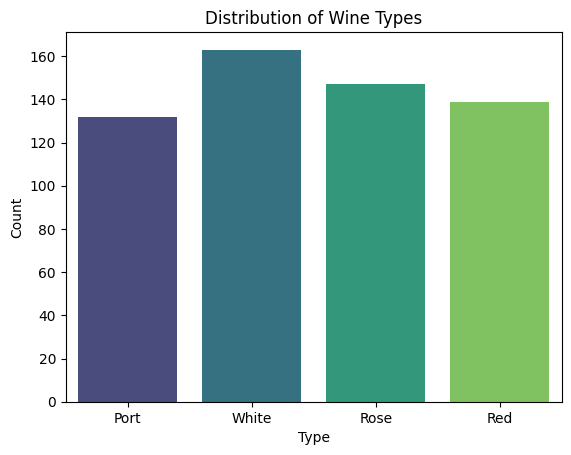

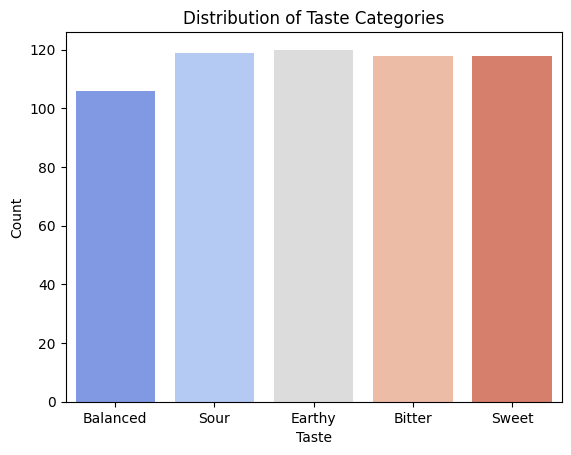

In [53]:
import warnings
warnings.filterwarnings('ignore')


# Plotting the distribution of the 'type' variable
sns.countplot(data=df, x='type', palette='viridis')
plt.title('Distribution of Wine Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

print()
# Plotting the distribution of the 'Taste' variable
sns.countplot(data=df, x='Taste', palette='coolwarm')
plt.title('Distribution of Taste Categories')
plt.xlabel('Taste')
plt.ylabel('Count')
plt.show()

### Heatmap
#### Heatmap is generally used to show the correlation of all the numeric variable to all the other numeric variables.

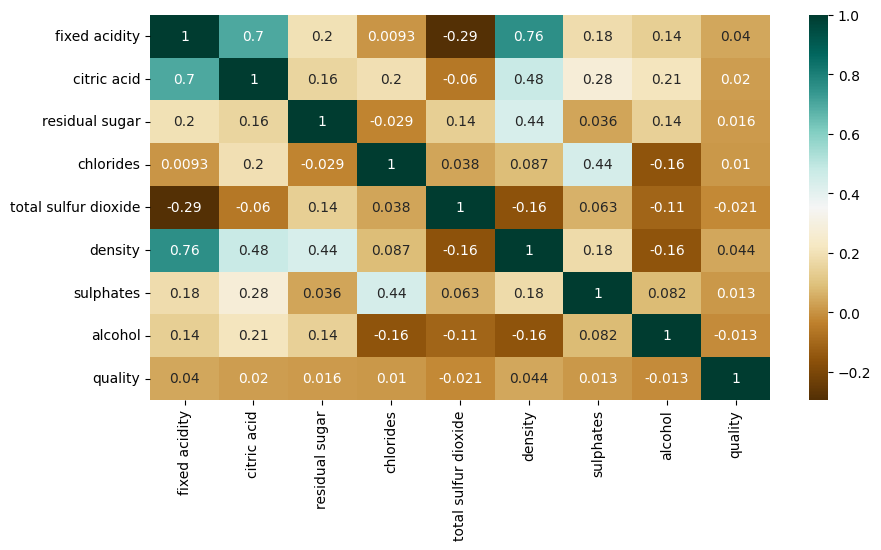

In [54]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 5))
c = numeric_df.corr()
sns.heatmap(c, cmap="BrBG", annot=True)
plt.show()

<br>

### Scatter Plot
#### Useful for visualizing the relationship between two continuous variables.


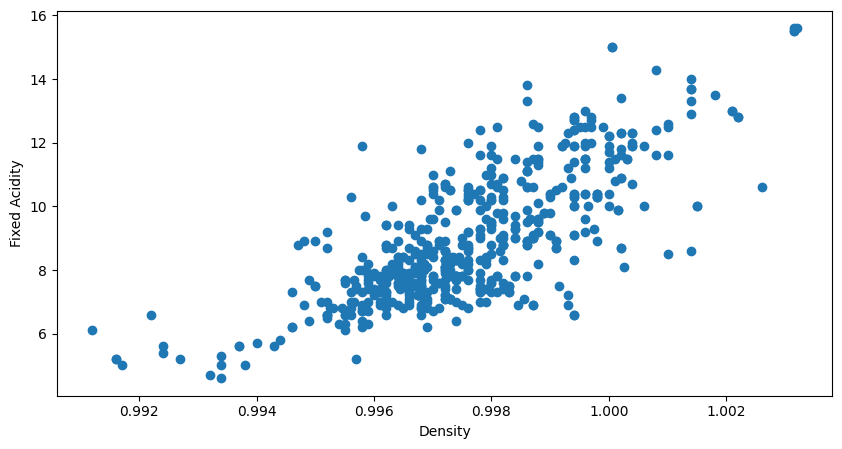

In [55]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df['density'], df['fixed acidity'])
ax.set_xlabel('Density')
ax.set_ylabel('Fixed Acidity')
plt.show()

#### We can see a slight positive corelation between fixed acidity and density.

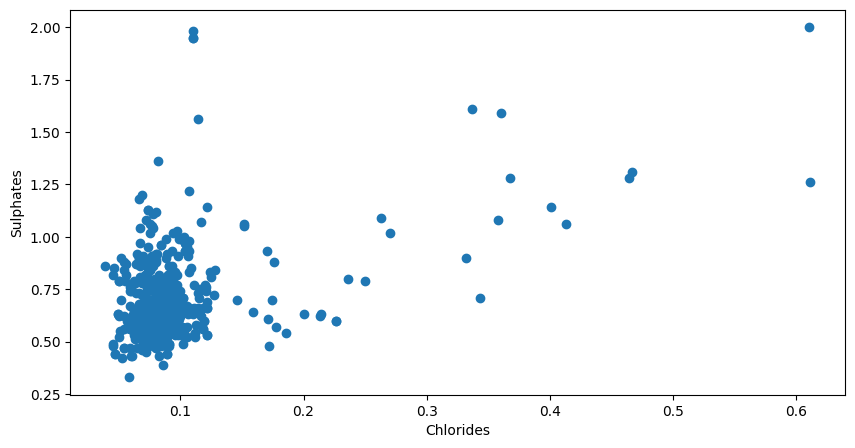

In [56]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df['chlorides'], df['sulphates'])
ax.set_xlabel('Chlorides')
ax.set_ylabel('Sulphates')
plt.show()

#### There is no corelation between Sulphates and Chlorides.

## Voilin Plot
#### A violin plot uses density curves to show the distribution of numeric data. The width of each curve represents the approximate frequency of data points in each region.

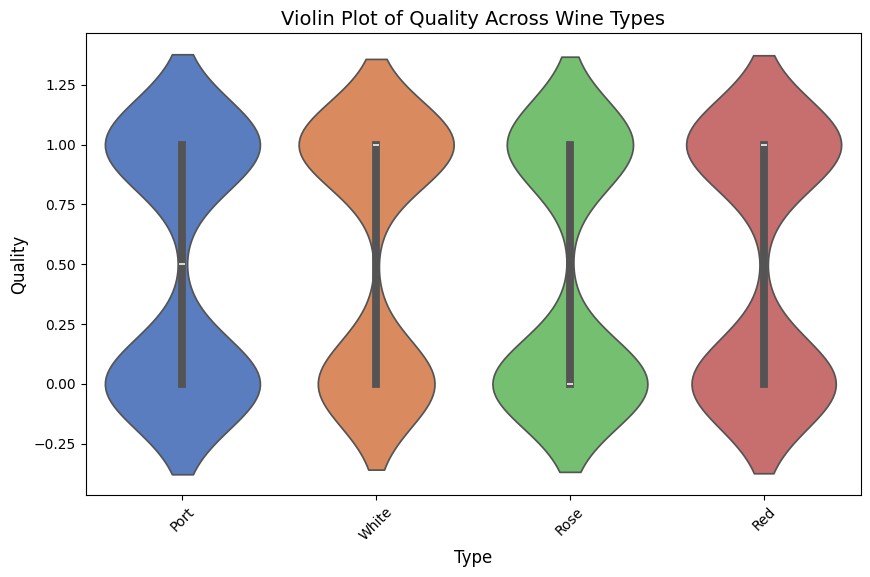

In [57]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='type', y='quality', palette='muted')
plt.title('Violin Plot of Quality Across Wine Types', fontsize=14)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Quality', fontsize=12)
plt.xticks(rotation=45)
plt.show()

#### The violin plot shows that most wines, regardless of type (Port, White, Rose, Red), have quality scores clustered around 5–6. Rose wines exhibit the most consistent distribution, while White and Red wines show more variability. Extreme quality scores (low or high) are less frequent across all wine types.

## Swarm Plot
#### A swarm plot is a categorical scatter plot that uses dots to represent data points, arranged so that they don't overlap. The arrangement makes the plot look like a swarm of bees.

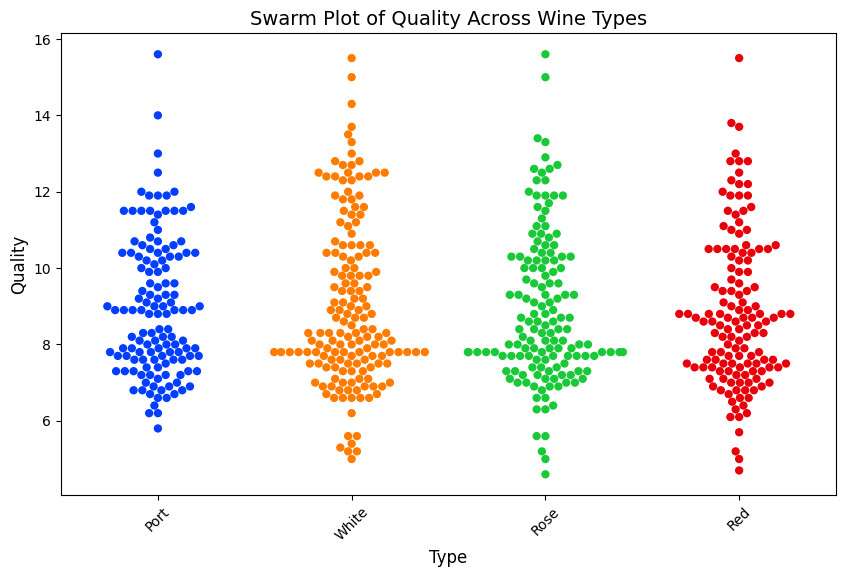

In [58]:
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df, x='type', y='fixed acidity', palette='bright', size=6)
plt.title('Swarm Plot of Quality Across Wine Types', fontsize=14)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Quality', fontsize=12)
plt.xticks(rotation=45)
plt.show()

#### The swarm plot shows the distribution of wine quality scores across types (Port, White, Rose, Red). Most wines cluster around mid-range scores (5–6) for all types. Outliers are visible at extreme scores, such as quality 3 or 8, indicating some variability. Rose wines appear more consistent, while others vary slightly more.

In [59]:
# Label Encoding for all non-numeric columns
label_encoder = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column is non-numeric
        df[col] = label_encoder.fit_transform(df[col])

# Display the transformed dataframe
print("Updated Numeric DataFrame:")
print(df.head())

# Verify the data types
print("\nData Types after Encoding:")
print(df.dtypes)

Updated Numeric DataFrame:
   fixed acidity  citric acid  residual sugar  chlorides  \
0            7.4         0.00             1.9      0.076   
1            7.8         0.00             2.6      0.098   
2            7.8         0.04             2.3      0.092   
3           11.2         0.56             1.9      0.075   
4            7.4         0.00             1.9      0.076   

   total sulfur dioxide  density  sulphates  alcohol  type  Taste  quality  
0                  34.0   0.9978       0.56      9.4     0      0        1  
1                  67.0   0.9968       0.68      9.8     3      3        0  
2                  54.0   0.9970       0.65      9.8     2      2        0  
3                  60.0   0.9980       0.58      9.8     3      1        1  
4                  34.0   0.9978       0.56      9.4     2      0        1  

Data Types after Encoding:
fixed acidity           float64
citric acid             float64
residual sugar          float64
chlorides               fl

## Spliting the dataset into Dependent and Independent Variables

In [60]:
df = df.rename(columns = {"quality" : "Target"})
df.head()
x = df.drop('Target', axis=1)
y = df["Target"]

## Decision Tree

In [61]:
def enhanced_decision_tree(X, y):
    # Encode target labels if needed
    if y.dtype == 'object' or y.dtype == 'category':
        from sklearn.preprocessing import LabelEncoder
        le = LabelEncoder()
        y = le.fit_transform(y)

    y_binarized = label_binarize(y, classes=np.unique(y))
    n_classes = y_binarized.shape[1]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    y_test_binarized = label_binarize(y_test, classes=np.unique(y))
    results = {}

    # Models to evaluate
    models = {
        "Gini": DecisionTreeClassifier(criterion="gini", max_depth=5, min_samples_split=10, random_state=42),
        "Entropy": DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=10, random_state=42),
    }


    for model_name, model in models.items():
        print(f"\n--- Decision Tree using {model_name} Criterion ---")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)
        acc = accuracy_score(y_test, y_pred)
        results[f"Decision Tree ({model_name})"] = acc

        # Performance Metrics
        print(f"Accuracy: {acc}")
        print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
        print("Classification Report:\n", classification_report(y_test, y_pred))
        
        precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
        print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F-Score: {fscore:.2f}")

        importance = model.feature_importances_
        for name, imp in zip(X.columns, importance):
            print(f"{name}: {imp}")


        # ROC Curve
        plt.figure(figsize=(8, 6))
        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_proba[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

        plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
        plt.title(f"ROC Curve for Decision Tree ({model_name})")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend(loc="lower right")
        plt.show()

        # Visualize the Tree
        plt.figure(figsize=(20, 10))
        plot_tree(model, feature_names=X.columns, class_names=np.unique(y).astype(str), filled=True, fontsize=10)
        plt.title(f"Decision Tree Visualization ({model_name})")
        plt.show()

    # --- Comparative Analysis ---
    print("\n--- Cross-Validation for Decision Tree (Gini Criterion) ---")
    gini_model = DecisionTreeClassifier(criterion="gini", random_state=42)
    gini_scores = cross_val_score(gini_model, X, y, cv=5)
    print("Cross-Validation Scores (Gini):", gini_scores)
    print("Mean Cross-Validation Accuracy (Gini):", gini_scores.mean())
    results["Decision Tree (Gini, Cross-Validation)"] = gini_scores.mean()

    print("\n--- Cross-Validation for Decision Tree (Entropy Criterion) ---")
    entropy_model = DecisionTreeClassifier(criterion="entropy", random_state=42)
    entropy_scores = cross_val_score(entropy_model, X, y, cv=5)
    print("Cross-Validation Scores (Entropy):", entropy_scores)
    print("Mean Cross-Validation Accuracy (Entropy):", entropy_scores.mean())
    results["Decision Tree (Entropy, Cross-Validation)"] = entropy_scores.mean()

    # --- Comparative Bar Plot ---
    plt.figure(figsize=(10, 6))
    plt.bar(results.keys(), results.values(), color=['skyblue', 'orange', 'lightgreen', 'coral'])
    plt.title("Decision Tree: Accuracy Comparison")
    plt.xticks(rotation=45)
    plt.ylabel("Accuracy")
    plt.tight_layout()
    plt.show()


--- Decision Tree using Gini Criterion ---
Accuracy: 0.452991452991453
Confusion Matrix:
 [[10 47]
 [17 43]]
Classification Report:
               precision    recall  f1-score   support

           0       0.37      0.18      0.24        57
           1       0.48      0.72      0.57        60

    accuracy                           0.45       117
   macro avg       0.42      0.45      0.41       117
weighted avg       0.43      0.45      0.41       117

Precision: 0.43, Recall: 0.45, F-Score: 0.41
fixed acidity: 0.07294162395134447
citric acid: 0.10399109824623236
residual sugar: 0.2678933102259779
chlorides: 0.0
total sulfur dioxide: 0.1618187399921468
density: 0.14641689645084727
sulphates: 0.22509495835438267
alcohol: 0.0
type: 0.0
Taste: 0.02184337277906842


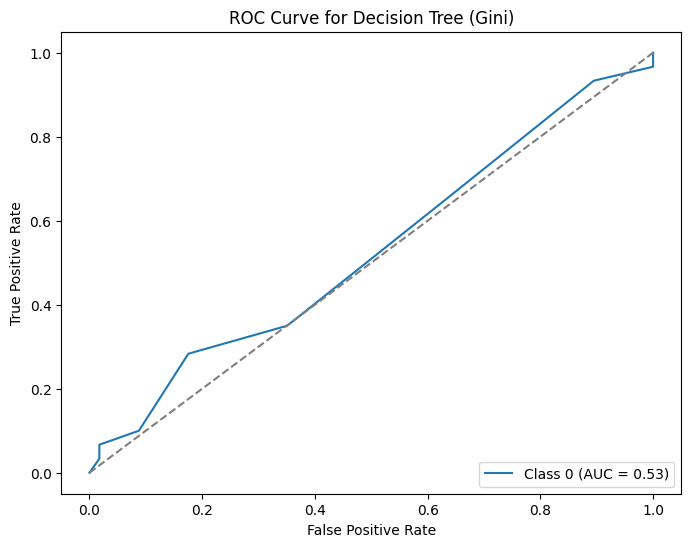

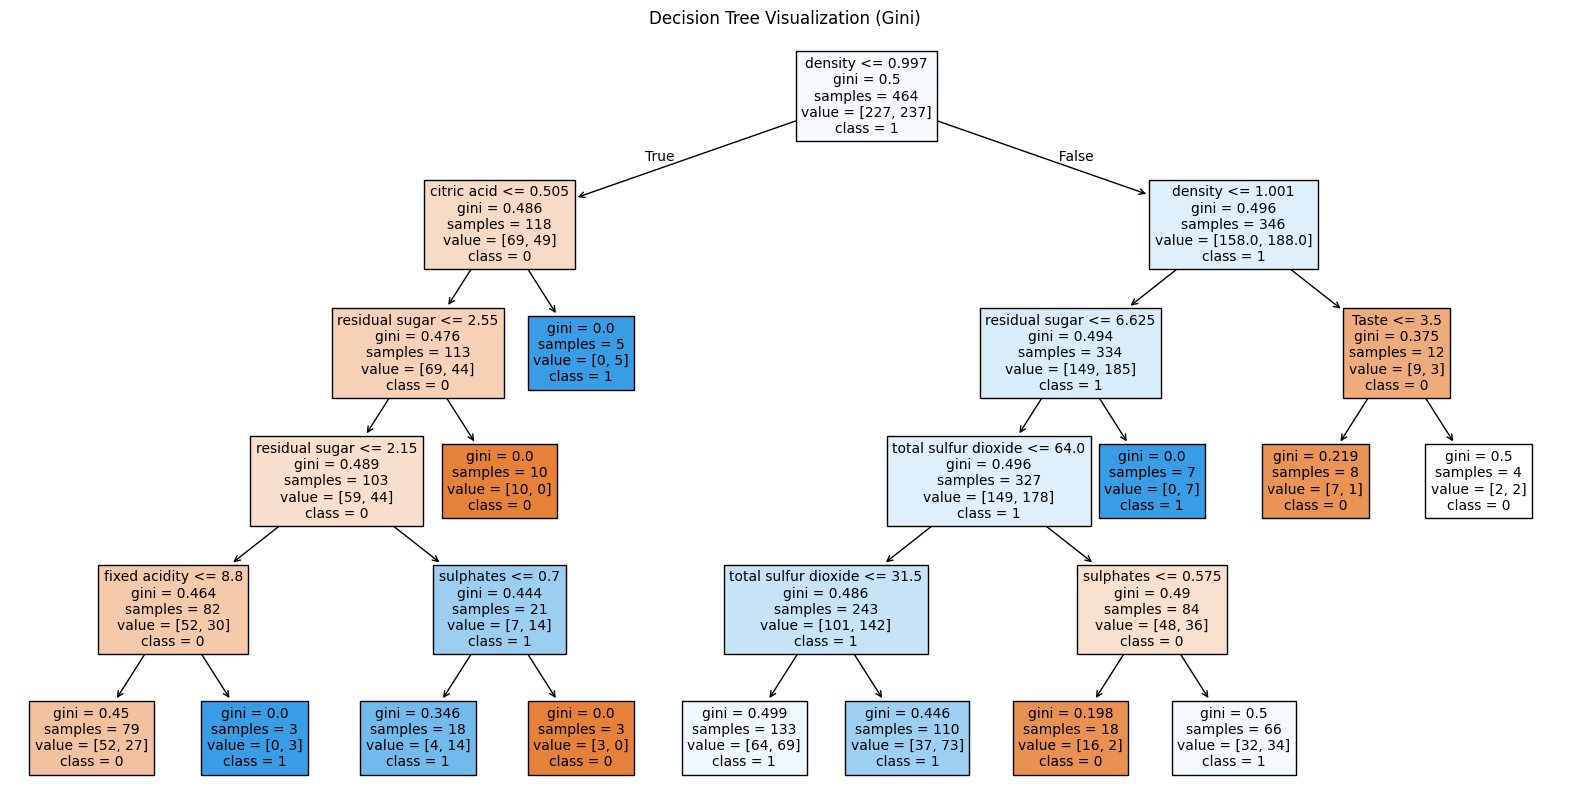


--- Decision Tree using Entropy Criterion ---
Accuracy: 0.5042735042735043
Confusion Matrix:
 [[20 37]
 [21 39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.35      0.41        57
           1       0.51      0.65      0.57        60

    accuracy                           0.50       117
   macro avg       0.50      0.50      0.49       117
weighted avg       0.50      0.50      0.49       117

Precision: 0.50, Recall: 0.50, F-Score: 0.49
fixed acidity: 0.0
citric acid: 0.15456012491140483
residual sugar: 0.4236119595734186
chlorides: 0.0
total sulfur dioxide: 0.20598468286579313
density: 0.16711195095524062
sulphates: 0.04873128169414276
alcohol: 0.0
type: 0.0
Taste: 0.0


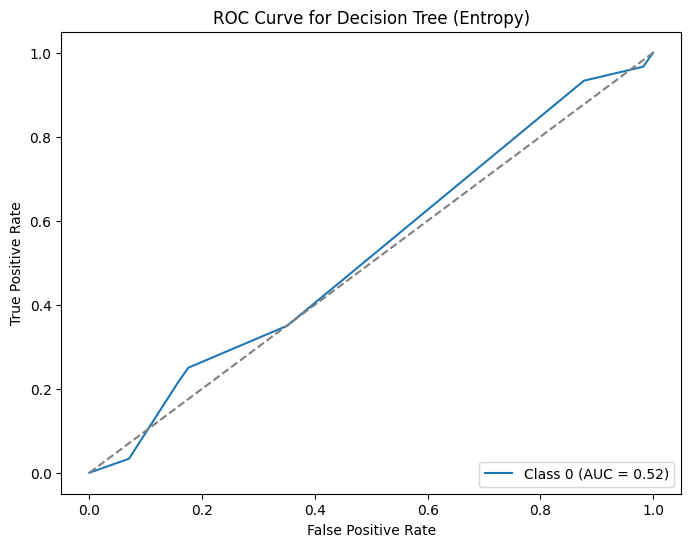

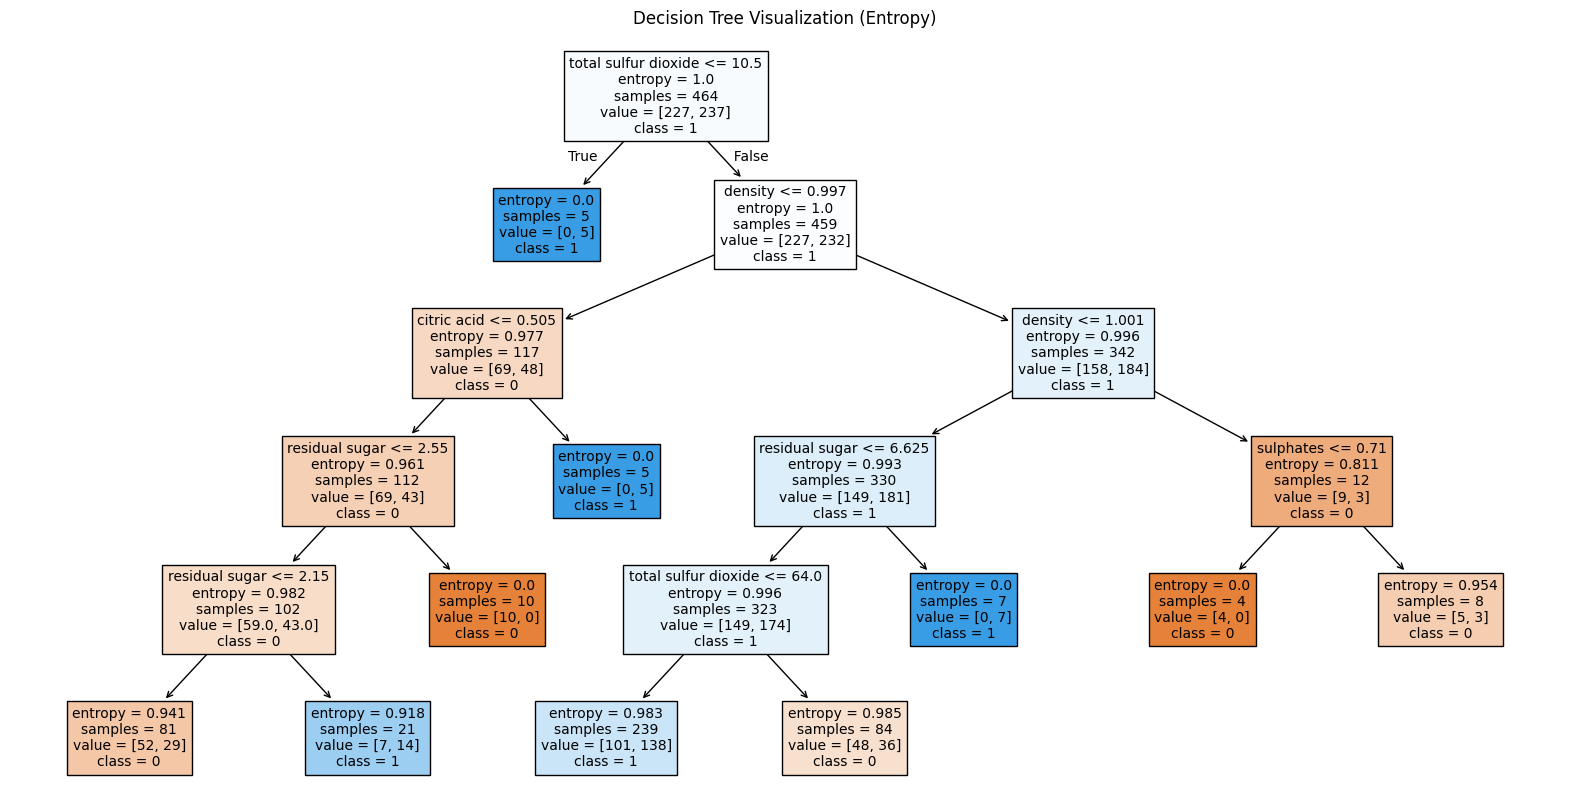


--- Cross-Validation for Decision Tree (Gini Criterion) ---
Cross-Validation Scores (Gini): [0.60683761 0.44827586 0.51724138 0.48275862 0.38793103]
Mean Cross-Validation Accuracy (Gini): 0.4886089006778661

--- Cross-Validation for Decision Tree (Entropy Criterion) ---
Cross-Validation Scores (Entropy): [0.54700855 0.50862069 0.52586207 0.44827586 0.48275862]
Mean Cross-Validation Accuracy (Entropy): 0.5025051576775715


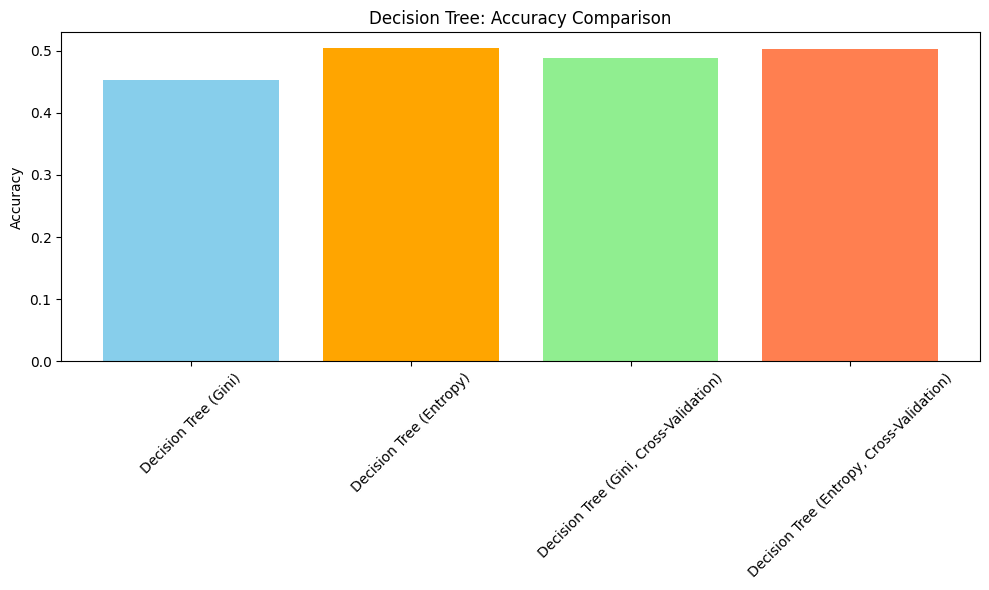

In [62]:
enhanced_decision_tree(x,y)

## Interpretation

### Summary of Performance Metrics

#### 1. Gini Criterion
- **Accuracy**: 0.45 (45.3%)
- **Precision**: 0.43
- **Recall**: 0.45
- **F1-Score**: 0.41

#### 2. Entropy Criterion
- **Accuracy**: 0.50 (50.4%)
- **Precision**: 0.50
- **Recall**: 0.50
- **F1-Score**: 0.49


#### Overall Accuracy
#### Both models perform similarly, with the entropy-based model slightly outperforming the Gini-based model. However, the differences are marginal, and both models have relatively low accuracy (close to 50%), suggesting significant room for improvement.

#### Class Imbalance or Data Challenges
- The imbalance in the confusion matrices, especially for class 0, indicates difficulty in accurately predicting this class.
- Class 1 has a higher recall, meaning the models perform better at identifying positive instances.

#### Feature Importances
- The reported feature importances vary between the models, reflecting different influences on the decision-making process.
- Features like **residual sugar**, **total sulfur dioxide**, and **density** seem important in both models.
- Other features, such as **alcohol** and **chlorides**, have minimal or no impact on the predictions.